In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,MinMaxScaler,StandardScaler,PolynomialFeatures,RobustScaler,PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Input,BatchNormalization
from imblearn.over_sampling import SMOTE


In [2]:
df4=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [3]:
df4.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [4]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df4['TotalCharges']=pd.to_numeric(df4['TotalCharges'],errors='coerce')

In [6]:
df4.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [42]:
df4['Churn'] = df4['Churn'].map({'Yes': 1, 'No': 0})


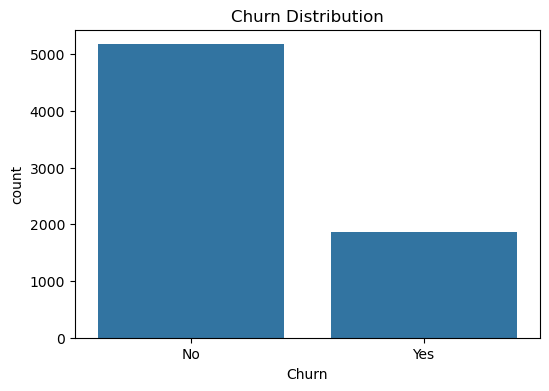

In [7]:
# Q1: Distribution of churners vs. non-churners
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df4)
plt.title("Churn Distribution")
plt.show()

In [8]:
# Average MonthlyCharges and TotalCharges for churners vs. non-churners
avg_charges = df4.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].mean().reset_index()
print(avg_charges)


  Churn  MonthlyCharges  TotalCharges
0    No       61.265124   2555.344141
1   Yes       74.441332   1531.796094


C:\Users\Mihir\AppData\Local\Temp\ipykernel_10300\2917915377.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df4[df4['Churn'] == 1]['tenure'], label='Churned', shade=True)
C:\Users\Mihir\AppData\Local\Temp\ipykernel_10300\2917915377.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df4[df4['Churn'] == 0]['tenure'], label='Not Churned', shade=True)


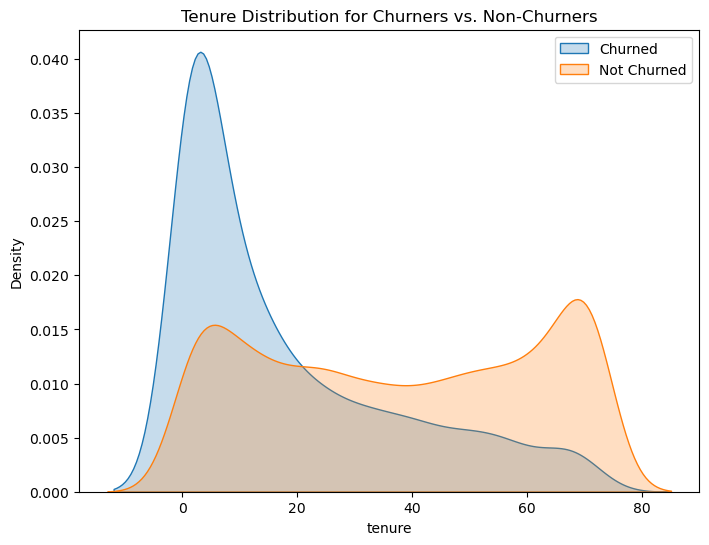

In [41]:
#Relationship between tenure and churn
plt.figure(figsize=(8, 6))
sns.kdeplot(df4[df4['Churn'] == 1]['tenure'], label='Churned', shade=True)
sns.kdeplot(df4[df4['Churn'] == 0]['tenure'], label='Not Churned', shade=True)
plt.title("Tenure Distribution for Churners vs. Non-Churners")
plt.legend()
plt.show()


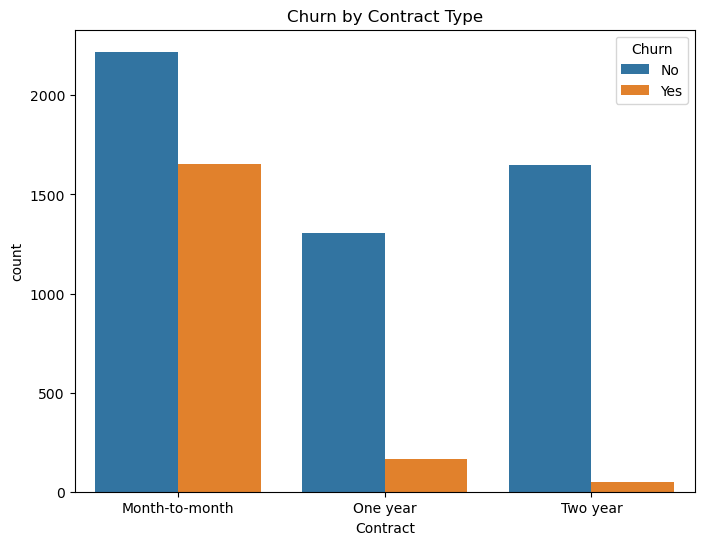

In [9]:
#Churn by contract type
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df4)
plt.title("Churn by Contract Type")
plt.show()

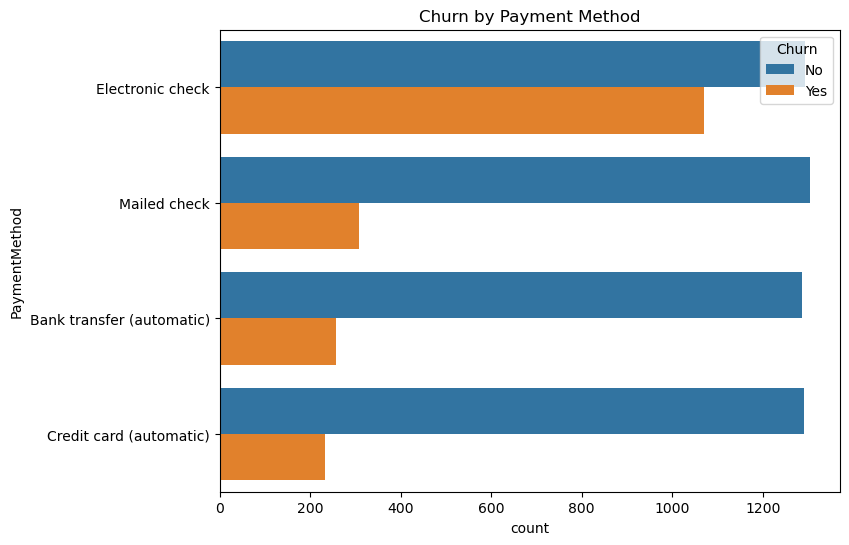

In [10]:
#Churn by payment method
plt.figure(figsize=(8, 6))
sns.countplot(y='PaymentMethod', hue='Churn', data=df4)
plt.title("Churn by Payment Method")
plt.show()

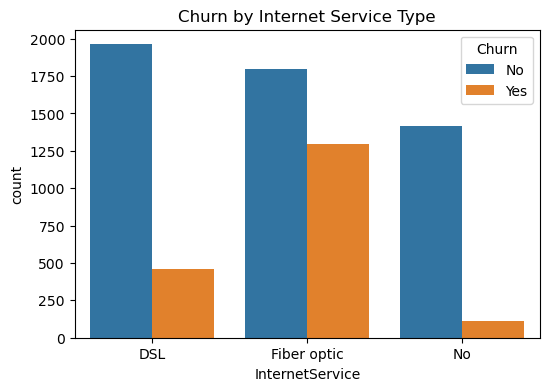

In [11]:
#Churn by Internet Service
plt.figure(figsize=(6, 4))
sns.countplot(x='InternetService', hue='Churn', data=df4)
plt.title("Churn by Internet Service Type")
plt.show()

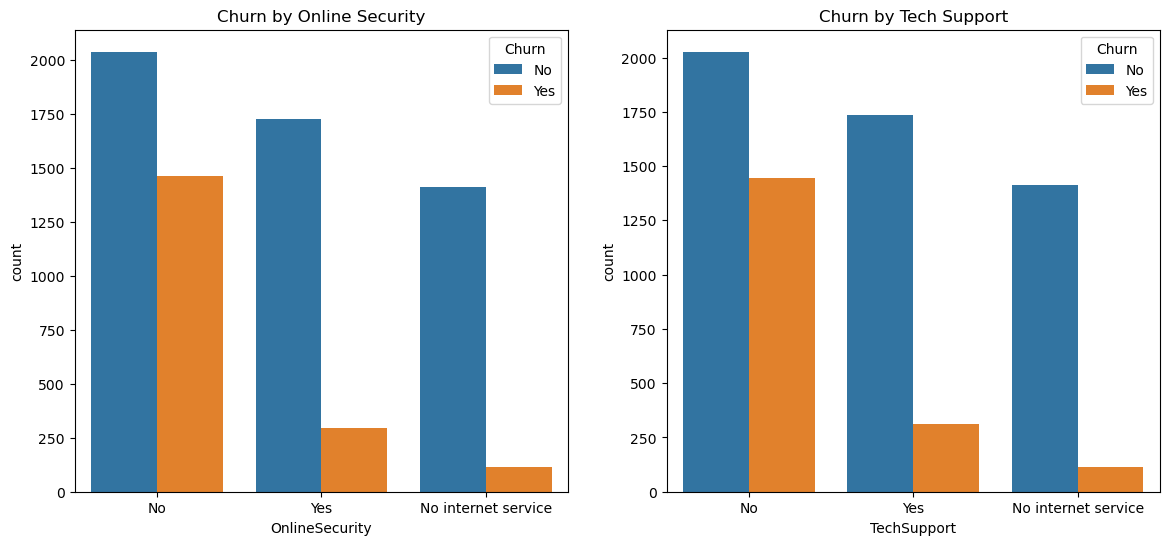

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=df4, ax=axes[0])
axes[0].set_title("Churn by Online Security")
sns.countplot(x='TechSupport', hue='Churn', data=df4, ax=axes[1])
axes[1].set_title("Churn by Tech Support")
plt.show()


<Axes: >

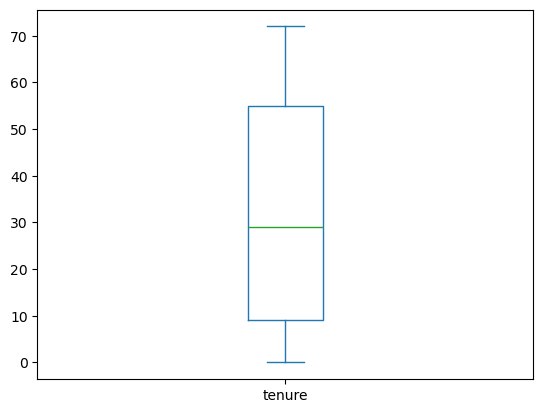

In [450]:
df4['tenure'].plot(kind='box')

<Axes: >

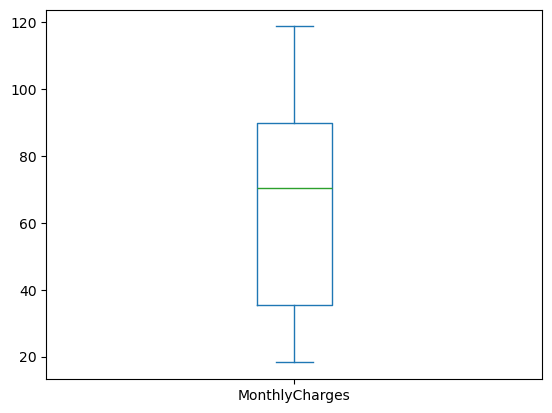

In [451]:
df4['MonthlyCharges'].plot(kind='box')

<Axes: >

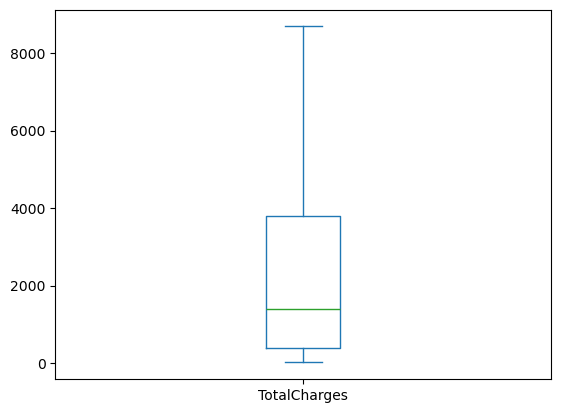

In [421]:
df4['TotalCharges'].plot(kind='box')

In [13]:
yes_no_columns = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df4[yes_no_columns]=df4[yes_no_columns].apply(lambda x:x.map({'Yes':1,"No":0}))

In [14]:
df4

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,Yes


In [15]:
df4.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
df4['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [17]:
#Detecting outliers as it was highly skewed
Q1=df4['TotalCharges'].quantile(0.25)
Q3=df4['TotalCharges'].quantile(0.75)

Iqr=Q3-Q1
lower_bound=Q1-1.5*Iqr
upper_bound=Q3+1.5*Iqr
outliers = df4[(df4['TotalCharges'] < lower_bound) | (df4['TotalCharges'] > upper_bound)]
print(f"Outliers count: {len(outliers)}")

Outliers count: 0


In [18]:
#encoded target varibale before pipeline because it has no direct encoding for  target varibale
#df4['Churn'] = df4['Churn'].map({'Yes': 1, 'No': 0})


In [19]:
df4.drop(columns=["customerID"],axis=1,inplace=True)

In [20]:
X=df4.drop('Churn',axis=1)
y=df4['Churn']

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,random_state=42)

In [22]:
Numerical_transformers=ColumnTransformer(transformers=[
    ('imputer1',make_pipeline(SimpleImputer(strategy="median"),FunctionTransformer(np.log1p, validate=True)),["TotalCharges"]),
    ('log1p',FunctionTransformer(np.log1p,validate=True),["MonthlyCharges","tenure"]),
],remainder='passthrough')

In [23]:
Categorical_transformers = ColumnTransformer(
    transformers=[
        ('Encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), 
         ["MultipleLines", "InternetService", "gender", "Contract", "PaymentMethod", "OnlineSecurity", 
          "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"])
    ],
    remainder='passthrough'
)

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', Numerical_transformers, ["MonthlyCharges","tenure","TotalCharges"]),
        ('categorical', Categorical_transformers, ["MultipleLines", "InternetService", "gender", "Contract", 
                                                  "PaymentMethod", "OnlineSecurity", "OnlineBackup", 
                                                  "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"])
    ],remainder='passthrough')

In [25]:
# Apply transformations to data (train-test split already done earlier)
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

In [26]:
# Scaling step using caler
scaler = RobustScaler()

In [27]:
# Apply scaling
scaler.fit(X_train_transformed)
X_train_scaled = scaler.transform(X_train_transformed)
X_val_scaled = scaler.transform(X_val_transformed)


In [28]:
# Apply SMOTE on the transformed and scaled data
#from imblearn.over_sampling import ADASYN
#smote = SMOTE(sampling_strategy='auto', k_neighbors=5,random_state=42)
#adasyn = ADASYN(sampling_strategy='auto', n_neighbors=10, random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
X_train_resampled, y_train_resampled =X_train_scaled, y_train


In [29]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Input
from keras.regularizers import l2
from keras import initializers

# Define the model
model = Sequential()

# Input layer
model.add(Input(shape=(X_train_scaled.shape[1],)))

# First Dense layer with Glorot Uniform initialization
model.add(Dense(712, activation='relu', kernel_initializer=initializers.GlorotUniform(), 
                kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second Dense layer with Glorot Uniform initialization
model.add(Dense(512, activation='relu', kernel_initializer=initializers.GlorotUniform(), 
                kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Third Dense layer with Glorot Uniform initialization
model.add(Dense(256, activation='relu', kernel_initializer=initializers.GlorotUniform(), 
                kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fourth Dense layer with Glorot Uniform initialization
model.add(Dense(128, activation='relu', kernel_initializer=initializers.GlorotUniform(), 
                kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fifth Dense layer with Glorot Uniform initialization
model.add(Dense(64, activation='relu', kernel_initializer=initializers.GlorotUniform(), 
                kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Sixth Dense layer with Glorot Uniform initialization
model.add(Dense(32, activation='relu', kernel_initializer=initializers.GlorotUniform(), 
                kernel_regularizer=l2(0.001)))

# Output layer with Glorot Uniform initialization
model.add(Dense(1, activation='sigmoid', kernel_initializer=initializers.GlorotUniform()))


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 712)                 │          22,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 712)                 │           2,848 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 712)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         365,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 568,409 (2.17 MB)

 Trainable params: 565,065 (2.16 MB)

 Non-trainable params: 3,344 (13.06 KB)

In [31]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adagrad

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

In [33]:
call_back=keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [34]:
model.fit(X_train_resampled, y_train_resampled, epochs=1000, batch_size=32, validation_data=(X_val_scaled, y_val),callbacks=call_back)


Epoch 1/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7342 - loss: 2.6093 - val_accuracy: 0.7653 - val_loss: 1.3249
Epoch 2/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7682 - loss: 1.1692 - val_accuracy: 0.7283 - val_loss: 0.8859
Epoch 3/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7740 - loss: 0.8195 - val_accuracy: 0.8045 - val_loss: 0.7753
Epoch 4/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7971 - loss: 1.0773 - val_accuracy: 0.7705 - val_loss: 1.0173
Epoch 5/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7772 - loss: 0.9897 - val_accuracy: 0.7889 - val_loss: 0.8054
Epoch 6/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7790 - loss: 0.8440 - val_accuracy: 0.7828 - val_loss: 0.8961
Epoch 7/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7724 - loss: 0.8555 - val_accuracy: 0.7993 - val_loss: 0.8439
Epoch 8/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7808 - loss: 1.6638 - 

In [35]:
import keras_tuner as kt

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD, Nadam, Ftrl
from tensorflow.keras.regularizers import l2
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping

# Define the model building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train_scaled.shape[1],)))

    # Add hidden layers based on the hyperparameter search
    for i in range(hp.Int('num_layers', 3, 6)):  # Number of layers to tune
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=64, max_value=712, step=64),  # Layer units
            activation='relu',
            kernel_regularizer=l2(0.001)  # Regularization added
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Choice(f'dropout_{i}', values=[0.3, 0.5])))  # Dropout rate

    model.add(Dense(1, activation='sigmoid'))

    # Choose optimizer for tuning
    optimizer_choice = hp.Choice('optimizer', ['adam', 'adagrad', 'rmsprop', 'sgd', 'nadam', 'ftrl'])  # Added optimizers
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    # Select optimizer based on the choice
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'adagrad':
        optimizer = Adagrad(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_choice == 'nadam':
        optimizer = Nadam(learning_rate=learning_rate)
    else:
        optimizer = Ftrl(learning_rate=learning_rate)

    # Compile the model with chosen optimizer and accuracy as metric
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])  # Optimizing for accuracy
    return model

# Initialize Keras Tuner with Random Search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Objective is to maximize accuracy
    max_trials=20,  # Number of trials for hyperparameter search
    executions_per_trial=1,  # Number of models to train per trial
    directory='tuning_results',
    project_name='churn_model_tuning'
)

# Define early stopping to prevent overfitting
early_stop_callback = EarlyStopping(
    monitor='val_accuracy',  # Monitor accuracy
    patience=20,  # Stop after 20 epochs if no improvement
    restore_best_weights=True
)

# Perform the hyperparameter search on the training data
tuner.search(X_train_resampled, y_train_resampled,
             epochs=1000,
             batch_size=32,
             validation_data=(X_val_scaled, y_val),
             callbacks=[early_stop_callback])

# Retrieve the best hyperparameters and display them
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best number of layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Layer {i} units: {best_hps.get(f'units_{i}')}, Dropout: {best_hps.get(f'dropout_{i}')}")
print(f"Best optimizer: {best_hps.get('optimizer')}, Learning rate: {best_hps.get('learning_rate')}")

# Build and compile the model using the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
best_model.compile(optimizer=best_model.optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the best model
best_model.fit(X_train_resampled, y_train_resampled,
               epochs=1000,
               batch_size=32,
               validation_data=(X_val_scaled, y_val),
               callbacks=[early_stop_callback])


Reloading Tuner from tuning_results\churn_model_tuning\tuner0.json
Best number of layers: 4
Layer 0 units: 576, Dropout: 0.3
Layer 1 units: 128, Dropout: 0.3
Layer 2 units: 576, Dropout: 0.5
Layer 3 units: 256, Dropout: 0.3
Best optimizer: rmsprop, Learning rate: 0.0001687328693742953
Epoch 1/1000


C:\Users\Mihir\AppData\Local\Temp\ipykernel_10300\1830351254.py:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5848 - loss: 1.6396 - val_accuracy: 0.7932 - val_loss: 1.4274
Epoch 2/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6989 - loss: 1.4226 - val_accuracy: 0.7989 - val_loss: 1.2865
Epoch 3/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7446 - loss: 1.3543 - val_accuracy: 0.7965 - val_loss: 1.2355
Epoch 4/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7479 - loss: 1.3236 - val_accuracy: 0.7965 - val_loss: 1.2013
Epoch 5/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7608 - loss: 1.2882 - val_accuracy: 0.8060 - val_loss: 1.1846
Epoch 6/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7726 - loss: 1.2390 - val_accuracy: 0.8027 - val_loss: 1.1687
Epoch 7/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7829 - loss: 1.2335 - val_accuracy: 0.8008 - val_loss: 1.1548
Epoch 8/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7794 - loss: 1.2110 - val_accuracy:

In [37]:
# Build the model with the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Initialize the model
best_model = Sequential()
best_model.add(Input(shape=(X_train_scaled.shape[1],)))

# Add layers based on the best hyperparameters
for i in range(best_hps.get('num_layers')):
    units = best_hps.get(f'units_{i}')
    best_model.add(Dense(units, activation='relu', kernel_regularizer=l2(0.001)))
    best_model.add(BatchNormalization())
    best_model.add(Dropout(best_hps.get(f'dropout_{i}')))  # Using the tuned dropout values

# Output layer
best_model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer_choice = best_hps.get('optimizer')
learning_rate = best_hps.get('learning_rate')

if optimizer_choice == 'adam':
    optimizer = Adam(learning_rate=learning_rate)
elif optimizer_choice == 'sgd':
    optimizer = SGD(learning_rate=learning_rate)
elif optimizer_choice == 'rmsprop':
    optimizer = RMSprop(learning_rate=learning_rate)

best_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
best_model.fit(X_train_resampled, y_train_resampled, epochs=1000, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stop_callback])


Epoch 1/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6019 - loss: 1.6279 - val_accuracy: 0.7941 - val_loss: 1.4083
Epoch 2/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7051 - loss: 1.4322 - val_accuracy: 0.8050 - val_loss: 1.2821
Epoch 3/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7373 - loss: 1.3832 - val_accuracy: 0.7993 - val_loss: 1.2349
Epoch 4/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7678 - loss: 1.3095 - val_accuracy: 0.8003 - val_loss: 1.2063
Epoch 5/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7599 - loss: 1.2981 - val_accuracy: 0.8050 - val_loss: 1.1808
Epoch 6/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7685 - loss: 1.2604 - val_accuracy: 0.7974 - val_loss: 1.1706
Epoch 7/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7661 - loss: 1.2508 - val_accuracy: 0.8022 - val_loss: 1.1522
Epoch 8/1000
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7813 - loss: 1.2213 - 

In [38]:
test_loss, test_accuracy = best_model.evaluate(X_val_scaled, y_val)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")



67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8123 - loss: 0.9174
Test Loss: 0.9214359521865845, Test Accuracy: 0.8130620121955872
